# Artificial Neural Network Play

An exploration of artificial neural networks. I already have an understanding on artificial neural networks from my final year at university, but I think that understanding is quite theoretical and shallow. I would like to play with neural networks so that I become familiar with their intricacies and gotchas. The purpose then of this document is to start from the very bottom and work my way up, developing the components of and then a whole artificial neural network from scratch before moving onto using established libraries (PyBrain, scikit-learn, etc.) and employing optimisations, such as using Theano.

There are a couple of tutorials, articles and such which I might be following closely, along with other more rigorous sources. They are:
 - https://datajobs.com/data-science-repo/Neural-Net-%5BCarlos-Gershenson%5D.pdf
 - http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
 - http://andrew.gibiansky.com/blog/machine-learning/coding-intro-to-nns/
 - http://iamtrask.github.io/2015/07/12/basic-python-network/
 
I will endeavour to cite other sources I use as I go.

## Basic Understanding

The anatomy of a neural network seems clear: it consists of neurons ands connections, corresponding to nodes and directed, weighted edges in the terminology of graphs. I believe that artifificial neural networks will always be able to be represented as directed, weighted, non cyclic-graphs. The network will consist of one input layer (one node for each input), one output layer (one node for each output) and any number of "hidden" layers, layers which do not recieve direct inputs or produce direct outputs. Each neuron will have inputs and one output. An "activation function" will produce a result, analogous to a real neuron firing, based upon the inputs multiplied by the weights. The weights characterise the network, and the power of neural networks comes in learning the weights, so that the final outputs match specific targets. And that, in a nutshell, is the essense of a neural network (without touching on backpropogation at all)!

## Play

The initial exploration will be based on Carlos Gershenson's pdf on the topic of artificial neural networks. It's an ab initio introduction, and will introduce ANNs in simple terms that I can then emulate in code.

### Perceptrons

Perceptrons were the first form of artificial neural network to be considered. They consist of a single layer, with inputs and a single output. They can be used as a binary classifier, for instance. Let's see if I can build one:

In [29]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
# Data
Dand = np.array([[1,1,1],[1,0,0],[0,1,0],[0,0,0]])
Dor =  np.array([[1,1,1],[1,0,1],[0,1,1],[0,0,0]])
# Dnand, Dnor, Dxor, Dxand, etc...

# Activation function
def heaviside(i):
    return 1 if i > 0 else 0

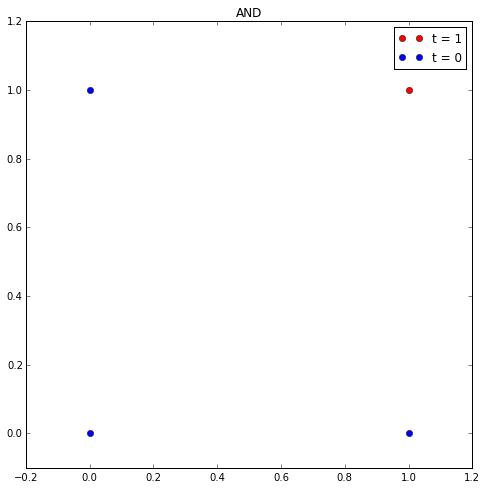

In [31]:
# Let's look at our data
I = Dand[:,-1] == 1
plt.figure(figsize=(8,8))
plt.plot(Dand[I][:,0], Dand[I][:,1], 'ro', label = "t = 1")
plt.plot(Dand[I==False][:,0], Dand[I==False][:,1], 'bo', label = "t = 0")
ax = plt.axis([-0.2, 1.2, -0.1, 1.2])
plt.legend()
plt.title("AND")

In [32]:
# Logical perceptron.
# Three inputs, one out.

np.random.seed(0)

# Generate our weights
w = np.random.rand(3)
print(w)

# Look at ins and outs
x = np.ones(3)
for i in range(Dand.shape[0]):
    x[1:] = Dand[i,:2]
    print(x, Dand[i,-1])

[ 0.5488135   0.71518937  0.60276338]
[ 1.  1.  1.] 1
[ 1.  1.  0.] 0
[ 1.  0.  1.] 0
[ 1.  0.  0.] 0


In [33]:
# Activate the neural network!
for i in range(Dand.shape[0]):
    x[1:] = Dand[i,:2]
    out = heaviside(np.sum(np.dot(w, x)))
    print("Out is " + str(out) + " target is " + str (Dand[i, -1]))

Out is 1 target is 1
Out is 1 target is 0
Out is 1 target is 0
Out is 1 target is 0


Obviously, this isn't great, but we have out perceptron firing! At this stage, this could be cleaned up and then used in training to change the weights.

In [34]:
# Training the weights / implementing the algorithm found on wikipedia here:
# https://en.wikipedia.org/wiki/Perceptron

# Definitions:
# ouput of the perceptron
def f(z):
    return heaviside(np.sum(z))



# Data
D = np.ones((4,4))
D[:,1:] = Dand

# Vector of weights, zero or small random number.
w = np.zeros(3)

# Learning rate 0 < alpha < 1. Can't be too high to will oscillate around solution.
alpha = 0.1

In [35]:
print(D)

[[ 1.  1.  1.  1.]
 [ 1.  1.  0.  0.]
 [ 1.  0.  1.  0.]
 [ 1.  0.  0.  0.]]


In [36]:
# Algorithm

for t in range(100):
    for row in D:
        # calculate out
        out = f(np.dot(row[:3], w))
        # update weights
        for i, wi in enumerate(w):
            w[i] = wi + alpha*(row[-1]- out)*row[i]


In [37]:
print("Trained weights:", w)

# Does it work?

for i, row in enumerate(D):
    assert(f(np.dot(row[:3], w)) == row[-1])

Trained weights: [-0.2  0.1  0.2]


Wow, I don't quite believe it, but I think it works! I managed to train a perceptron to identify the logical AND relation. Can I generalise and tackle the other logical relations?

In [38]:
def heaviside(i):
    return 1 if i > 0 else 0

class Perceptron:
    def __init__(self, ni, bias = False, weights = None, func = heaviside):
        """
        Create a perceptron instance.
        """
        # Number of inputs
        self.ni = ni
        
        # Does the input vector contain a term for the bias (x_0) ?
        self.bias = bias
        
        if weights:
            self.weights = list(weights)
            if bias:
                assert(ni == len(weights))
            else:
                assert(ni+1 == len(weights))
        else:
            self.weights = [0]*ni
            if not self.bias:
                self.weights += [0]
            
        self.func = func
            
    def activate(self, in_vec):
        in_vec = list(in_vec)
        if not self.bias:
            in_vec = [1]+in_vec
        assert(len(in_vec)==len(self.weights))
        return self.func(sum([i*w for i, w in zip(in_vec, self.weights)]))
    
    def train(Xtr, alpha, iterations):
        pass
        # Assert size of Xtr is correct
        # have a default alpha size
        # have a default number of iterations
        # perhaps have some arguments about other termination criteria.

In [39]:
# See if we can reproduce the same activation result as earlier.
np.random.seed(0)
weights = [np.random.rand() for i in range(3)]

print("Weights:\n", weights)
print("\nFeatures and targets:\n",Dand,"\n")

pec = Perceptron(2, weights = weights)

for i in range(Dand.shape[0]):
    out = pec.activate(Dand[i,:2])
    print("Out is " + str(out) + " target is " + str (Dand[i, -1]))

Weights:
 [0.5488135039273248, 0.7151893663724195, 0.6027633760716439]

Features and targets:
 [[1 1 1]
 [1 0 0]
 [0 1 0]
 [0 0 0]] 

Out is 1 target is 1
Out is 1 target is 0
Out is 1 target is 0
Out is 1 target is 0


Same result for activating the perceptron as above. Nice. It's a poor test though and I'm going to have to do a few more in a test file. For now though, onto the training algorithm.



In [41]:
class Perceptron:
    def __init__(self, ni, bias = False, weights = None, func = heaviside):
        """
        Create a perceptron instance.
        """
        # Number of inputs
        self.ni = ni
        
        # Does the input vector contain a term for the bias (x_0) ?
        self.bias = bias
        
        if weights:
            self.weights = list(weights)
            if bias:
                assert(ni == len(weights))
            else:
                assert(ni+1 == len(weights))
        else:
            self.weights = [0]*ni
            if not self.bias:
                self.weights += [0]
            
        self.func = func
            
    def activate(self, in_vec):
        in_vec = list(in_vec)
        if not self.bias:
            in_vec = [1]+in_vec
        #assert(len(in_vec)==len(self.weights))
        return self.func(sum([i*w for i, w in zip(in_vec, self.weights)]))
    
    def train(self, Xtr, alpha = 0.1, iterations = 100):
        """
        Train the perceptron using the algorithm found on this page:
        https://en.wikipedia.org/wiki/Perceptron#Steps
        
        Xtr : numpy.array
          A two dimensional array.
        alpha : float
          The learning rate of the algorithm: how greedily the algorithm learns from the data.
        iterations : int
          Number of iterations of the algorithm.
        """
        # Assert size of Xtr is correct
        #if self.bias:
        #    assert(Xtr.shape[1] == len(self.weights))
        #else:
        #    assert(Xtr.shape[1] == len(self.weights))
            
        for i in range(iterations):
            j = i%Xtr.shape[0]
            
            # Get output
            in_vec = [1] + list(Xtr[j, :-1])
            print("in_vec:", in_vec)
            print("weights:", self.weights)
            target = Xtr[j, -1]
            out = self.activate(in_vec)
            # Update weights:
            #for i, wi in enumerate(w):
            #    w[i] = wi + alpha*(row[-1]- out)*row[i]
            self.weights = [w + alpha * (target - out) * v for v, w in zip(in_vec, self.weights)]
            
        # have a default alpha size
        # have a default number of iterations
        # perhaps have some arguments about other termination criteria.
print(Dand)
        
pec = Perceptron(2)
pec.train(Dand)
print(pec.weights)

[[1 1 1]
 [1 0 0]
 [0 1 0]
 [0 0 0]]
in_vec: [1, 1, 1]
weights: [0, 0, 0]
in_vec: [1, 1, 0]
weights: [0.10000000000000001, 0.10000000000000001, 0.10000000000000001]
in_vec: [1, 0, 1]
weights: [0.0, 0.0, 0.10000000000000001]
in_vec: [1, 0, 0]
weights: [0.0, 0.0, 0.10000000000000001]
in_vec: [1, 1, 1]
weights: [0.0, 0.0, 0.10000000000000001]
in_vec: [1, 1, 0]
weights: [0.0, 0.0, 0.10000000000000001]
in_vec: [1, 0, 1]
weights: [-0.10000000000000001, -0.10000000000000001, 0.10000000000000001]
in_vec: [1, 0, 0]
weights: [-0.10000000000000001, -0.10000000000000001, 0.10000000000000001]
in_vec: [1, 1, 1]
weights: [-0.10000000000000001, -0.10000000000000001, 0.10000000000000001]
in_vec: [1, 1, 0]
weights: [0.0, 0.0, 0.20000000000000001]
in_vec: [1, 0, 1]
weights: [-0.10000000000000001, -0.10000000000000001, 0.20000000000000001]
in_vec: [1, 0, 0]
weights: [-0.10000000000000001, -0.10000000000000001, 0.20000000000000001]
in_vec: [1, 1, 1]
weights: [-0.10000000000000001, -0.10000000000000001, 0.2

In [42]:
print("Weights:\n", pec.weights)
print("\nFeatures and targets:\n",Dand,"\n")

for i in range(Dand.shape[0]):
    out = pec.activate(Dand[i,:2])
    print("Out is " + str(out) + " target is " + str (Dand[i, -1]))


Weights:
 [-0.89999999999999991, -0.89999999999999991, 1.6000000000000003]

Features and targets:
 [[1 1 1]
 [1 0 0]
 [0 1 0]
 [0 0 0]] 

Out is 0 target is 1
Out is 0 target is 0
Out is 1 target is 0
Out is 0 target is 0


Ok, try and refactor:

In [54]:
class Perceptron:
    def __init__(self, ni, weights = None, func = heaviside):
        """
        Create a perceptron instance.
        """
        # Number of inputs
        self.ni = ni
        
        try:
            self.weights = list(weights)
            assert(len(self.weights)==ni+1)
        except TypeError:
            self.weights = [0]*(ni+1)
            
        self.func = func
            
    def activate(self, in_vec):
        in_vec = [1]+list(in_vec)
        assert(len(in_vec)==len(self.weights))
        return self.func(sum([v*w for v, w in zip(in_vec, self.weights)]))
    
    def train(self, Xtr, alpha = 0.1, iterations = 100, verbose = False):
        """
        Train the perceptron using the algorithm found on this page:
        https://en.wikipedia.org/wiki/Perceptron#Steps
        
        Xtr : numpy.array
          A two dimensional array.
        alpha : float
          The learning rate of the algorithm: how greedily the algorithm learns from the data.
        iterations : int
          Number of iterations of the algorithm.
        """
        # Assert size of Xtr is correct
        #if self.bias:
        #    assert(Xtr.shape[1] == len(self.weights))
        #else:
        #    assert(Xtr.shape[1] == len(self.weights))
            
        for i in range(iterations):
            j = i%Xtr.shape[0]
            
            # Get output
            in_vec = list(Xtr[j, :-1])
            if verbose:
                print("in_vec:", in_vec)
                print("weights:", self.weights)
            target = Xtr[j, -1]
            out = self.activate(in_vec)
            # Update weights:
            #for i, wi in enumerate(w):
            #    w[i] = wi + alpha*(row[-1]- out)*row[i]
            self.weights = [w + alpha * (target - out) * v for v, w in zip([1]+in_vec, self.weights)]
            
        # have a default alpha size
        # have a default number of iterations
        # perhaps have some arguments about other termination criteria.
    def accuracy(self, Xtr):
        results = [self.activate(row[:-1])==row[-1] for row in Xtr]
        return sum(results)/len(results)
    
print(Dand)
        
pec = Perceptron(2)
pec.train(Dand)
print(pec.weights)
for row in Dand:
    assert(pec.activate(row[:-1])==row[-1])
    
print(pec.accuracy(Dand))

[[1 1 1]
 [1 0 0]
 [0 1 0]
 [0 0 0]]
[-0.20000000000000001, 0.10000000000000001, 0.20000000000000001]
1.0


Yes! That seems to work and I took out that silliness of bias. I'd like to return to that though, because ideally when passing vectors around internally, I'd like to not have to worry about ```[1]+in_vec``` vs ```in_vec```

### Perceptron conclusions

I could spend more time playing with perceptrons, but I think that'll do for now. I might create an ANN package and solidify what I have here with a test suite. This is the end of part one, though, it's time to return to learning about ANNs.